In [72]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import pylab as p
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib
%matplotlib inline

In [73]:
seg_volt = np.array([200, 0, 0, 0, 0, 0])
coeff = (seg_volt/100.0)

# 先测试yz平面的电压是否正确

In [74]:
u_base = []
n_grid_points=150
for n in ["12", "38", "49", "510", "611", "712"]:
        f=open("u_yz_z_list_start=8_{}=100V.pkl".format(n), "r")
        u_base.append(pkl.load(f))
        f.close()
u_yz = np.zeros((1,  n_grid_points * n_grid_points))
# print u_yz.shape
for i in range(6):
#     print u_base[i].shape
    u_yz = u_yz + coeff[i] * u_base[i]
u_yz = u_yz.reshape(n_grid_points, n_grid_points)

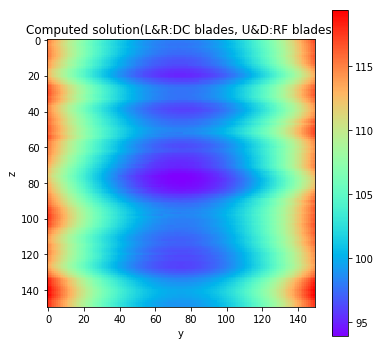

In [75]:
plt.figure(figsize=(6,6))
# cmap = sns.diverging_palette(220, 20, n=7,as_cmap=True)
data = u_yz.T
plt.imshow(data,aspect=1.0,cmap='rainbow')
plt.title('Computed solution(L&R:DC blades, U&D:RF blades)')
plt.xlabel('y')
plt.ylabel('z')
plt.colorbar()

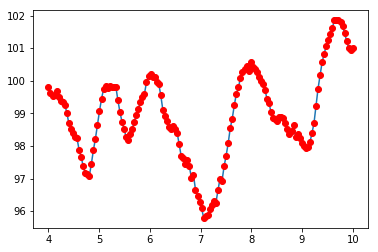

In [76]:
plt.plot(np.linspace(4, 10, n_grid_points), u_yz[50,:])
plt.plot(np.linspace(4, 10, n_grid_points), u_yz[50,:],'ro')

In [127]:
u_yz[50,0]

99.821224131021609

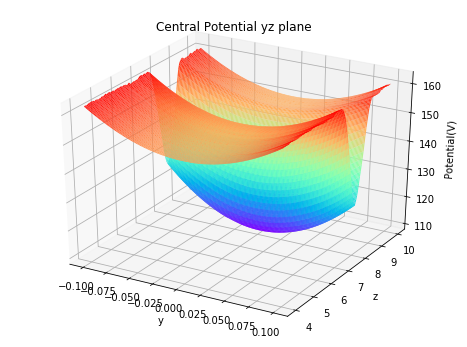

In [95]:
import mpl_toolkits.mplot3d
import pylab as p
import mpl_toolkits.mplot3d.axes3d as p3
z1 = 4
z2 = 10
yz_grid = np.mgrid[-0.1:0.1:n_grid_points*1j,     # 指定x范围，1j不表示虚数，而是指grid包含两个端点。
                     z1:z2:n_grid_points*1j]     # 指定y范围
                  # 指定z平面
yz_points = np.vstack((np.zeros(yz_grid[0].size),
                    yz_grid[0].ravel(),             #ravel()将多维矩阵展成一维，返回视图。
                    yz_grid[1].ravel()))
plt.figure(figsize=(8,6))
ax=plt.subplot(111,projection='3d')
ax.plot_surface(yz_grid[0],yz_grid[1],u_yz,rstride=1,cstride=1,cmap='rainbow')
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_zlabel('Potential(V)')
plt.title("Central Potential yz plane")
p.show()

## 提取基电势数据

In [15]:
n_grid_points = 150
z_list = np.array([0, 2, 4, 5, 5.5, 6, 6.5, 7, 8, 9, 10, 11, 12])
yz_base = []                # yz平面电势
xz_base = []                # xz平面电势
xy_base = []
for n in ["12", "38", "49", "510", "611", "712"]:
        f=open("u_yz_z_list_start=8_{}=100V.pkl".format(n), "r")
        yz_base.append(pkl.load(f).reshape(n_grid_points, n_grid_points))
        f.close()
        
        f=open("u_xz_z_list_start=8_{}=100V.pkl".format(n), "r")
        xz_base.append(pkl.load(f).reshape(n_grid_points, n_grid_points))
        f.close()
        
        f = open("u_xy_z_list_start=8_{}=100V.pkl".format(n), "r")
        t = np.array(pkl.load(f)).reshape(len(z_list), n_grid_points, n_grid_points)
        xy_base.append(t)
        f.close

## 给定边界电势，计算囚禁区电势
给定不同电极的电压，可以计算：
- yz平面(x=0)电势。$x = 0, y\in [-0.1, 0.1], z\in [4, 10],unit:mm$
- xz平面(y=0)电势。$x\in [-0.1, 0.1], y = 0, z\in [4, 10]$
- xy平面(z=z_list)电势。$x\in [-0.1, 0.1], y\in [-0.1, 0.1], z=[z_list]$

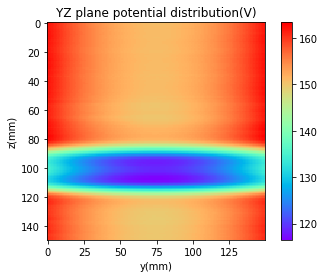

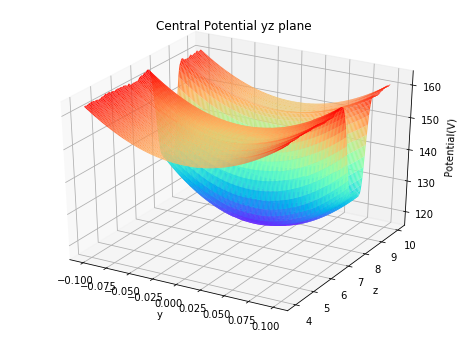

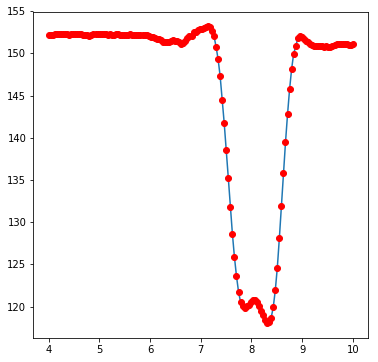

In [71]:

def draw_yz_potential(seg_volt, base=yz_base):
    assert len(seg_volt) == 6
    u = np.zeros((n_grid_points, n_grid_points))
    grid = np.mgrid[-0.1:0.1:n_grid_points*1j,
                     4:10:n_grid_points*1j]
    # 计算总电势u
    for i in range(6):
        u = u + seg_volt[i]/100.0*base[i]
    
    #画电势热图
    
    plt.figure(figsize=(6,4))
    data = u.T
    plt.imshow(data,aspect=1.0,cmap='rainbow')
    plt.title('YZ plane potential distribution(V)')
    plt.xlabel('y(mm)')
    plt.ylabel('z(mm)')
    plt.colorbar()
#     fig1.show()
    
    #画电势3D图
    plt.figure(figsize=(8,20))
    ax=plt.subplot(312,projection='3d')
    ax.plot_surface(grid[0],grid[1],u,rstride=1,cstride=1,cmap='rainbow')
    ax.set_xlabel('y')
    ax.set_ylabel('z')
    ax.set_zlabel('Potential(V)')
    plt.title("Central Potential yz plane")
    plt.show()
    
    plt.figure(figsize=(6,6))
    plt.plot(np.linspace(4, 10, n_grid_points), u[50,:])
    plt.plot(np.linspace(4, 10, n_grid_points), u[50,:],'ro')
seg_volt = [200, 100, 20, 50, 20, 100]
draw_yz_potential(seg_volt)

# 计算假势